# **_Fake News Detection Project_**

## **Name : Indrajith M P**


### This project aims to build a fake news detection system using datasets from two different sources: an international news dataset and an Indian news dataset. The goal is to combine these datasets and prepare them for further analysis and model training. Combining and preparing these datasets will provide a comprehensive foundation for further analysis and model training, ultimately contributing to the fight against the spread of false information.

---

**Reference:** <br>
International News Dataset : [International real and fake News](https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets) <br>
Indian News Dataset : [Indian fake and real news](https://www.kaggle.com/datasets/sonalgarg174/ifnd-dataset)

---


# **Step I. Data Loading, Preprocessing, Merging, and Final Dataset Preparation**


#### We start by importing the pandas library, which we'll use for data manipulation and analysis.


In [2]:
import pandas as pd

## <u>**Loading and preprocessing the International News Datasets**</u>


### Here, we load two CSV files from the international news dataset:

#### - 'True.csv': Contains true news articles

#### - 'Fake.csv': Contains fake news articles

### Let's examine the structure of these dataframes:


In [4]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

# Set up Kaggle API authentication
os.environ["KAGGLE_CONFIG_DIR"] = "."  # Assumes kaggle.json is in the current directory

api = KaggleApi()
api.authenticate()

dataset_name = "clmentbisaillon/fake-and-real-news-dataset"

# Ensure the dataset is downloaded
api.dataset_download_file(dataset_name, "True.csv")
api.dataset_download_file(dataset_name, "Fake.csv")

# Read files into Pandas
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

# Display samples
print("Sample of True.csv:\n", df_true.head())
print("\nSample of Fake.csv:\n", df_fake.head())

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


FileNotFoundError: [Errno 2] No such file or directory: 'True.csv'

In [2]:
dataset_name = "clmentbisaillon/fake-and-real-news-dataset"

In [3]:
# Download and read `True.csv` directly
true_data = api.dataset_download_file(dataset_name, "True.csv")
df1 = pd.read_csv(BytesIO(true_data))
print("Sample of True.csv:\n", df1.head())

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


TypeError: a bytes-like object is required, not 'bool'

In [13]:
# Read into Pandas DataFrame
fake_news_df = pd.read_csv(io.BytesIO(fake_news_csv), encoding="utf-8")
real_news_df = pd.read_csv(io.BytesIO(real_news_csv), encoding="utf-8")

TypeError: a bytes-like object is required, not 'bool'

In [8]:
df1.head()

AttributeError: 'bool' object has no attribute 'head'

In [5]:
df2.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### As we can see, both dataframes contain columns for **'title', 'text', 'subject', and 'date'**. We'll need to preprocess this data for our analysis.


# Data Preprocessing for International News


### **Adding Labels**

### We'll add a 'Label' column to distinguish between true and fake news:

#### - 1 for true news

#### - 0 for fake news


In [6]:
df1['Label'] = 1
df2['Label'] = 0

### **Combining Title and Text**

#### To create a single text field for analysis, we'll combine the 'title' and 'text' columns:


In [7]:
df1['Text'] = df1['title'] + " " + df1['text']
df2['Text'] = df2['title'] + " " + df2['text']

### **Removing Unnecessary Columns**

#### We are dropping the columns 'subject', 'date', 'text', and 'title' from both datasets as they do not contribute to predicting whether the news is real or fake. The 'title' column has already been combined with the 'text' column to form a single 'Text' column, which will be used for analysis. This step simplifies the dataset and ensures that only relevant features are considered in the model training process.


In [8]:
df1.drop(columns=['subject','date','text','title'],inplace=True)
df2.drop(columns=['subject','date','text','title'],inplace=True)

In [9]:
df1.head()

,Label,Text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [10]:
df2.head()

,Label,Text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


## **Text Cleaning**


### This function performs the following cleaning operations:

#### 1. Removes non-alphabetic characters (except spaces)

#### 2. Converts text to lowercase

#### 3. Removes extra whitespace


In [11]:
import re
def clean_text(text):
    # Ensure the input is a string
    text = str(text)
    # Remove non-alphabetic characters (excluding spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

### _This function is necessary to standardize and clean the text data, ensuring consistency and improving the accuracy of the model by removing irrelevant characters, normalizing case, and eliminating redundant spaces._


In [12]:
df1['Text'] = df1['Text'].apply(clean_text)
df2['Text'] = df2['Text'].apply(clean_text)

## **<u>Loading and Preprocessing the Indian News Dataset</u>**


In [13]:
indian_df = pd.read_csv("Data/IFND.csv")

In [14]:
indian_df.head()

,Label,Statement
0,TRUE,"WHO praises India's Aarogya Setu app, says it ..."
1,TRUE,"In Delhi, Deputy US Secretary of State Stephen..."
2,TRUE,LAC tensions: China's strategy behind delibera...
3,TRUE,India has signed 250 documents on Space cooper...
4,TRUE,Tamil Nadu chief minister's mother passes away...


### The Indian news dataset has a different structure, with 'Label' and 'Statement' columns. We'll rename 'Statement' to 'Text' for consistency with our other dataset.


In [15]:
indian_df = indian_df.rename(columns={"Statement":"Text"})

In [16]:
indian_df.head()

,Label,Text
0,TRUE,"WHO praises India's Aarogya Setu app, says it ..."
1,TRUE,"In Delhi, Deputy US Secretary of State Stephen..."
2,TRUE,LAC tensions: China's strategy behind delibera...
3,TRUE,India has signed 250 documents on Space cooper...
4,TRUE,Tamil Nadu chief minister's mother passes away...


### **Mapping Labels**

### We'll map the labels to match our international dataset:

##### - 'TRUE' to 1

##### - 'Fake' to 0


In [17]:
label_map = {"TRUE":1,"Fake":0}

In [18]:
indian_df["Label"] = indian_df["Label"].replace(label_map)

C:\Users\indra\AppData\Local\Temp\ipykernel_15632\1848593248.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  indian_df["Label"] = indian_df["Label"].replace(label_map)


In [19]:
indian_df.head()

,Label,Text
0,1,"WHO praises India's Aarogya Setu app, says it ..."
1,1,"In Delhi, Deputy US Secretary of State Stephen..."
2,1,LAC tensions: China's strategy behind delibera...
3,1,India has signed 250 documents on Space cooper...
4,1,Tamil Nadu chief minister's mother passes away...


### **Cleaning Text**

### We'll apply the same text cleaning function to the Indian dataset:


In [20]:
indian_df["Text"] = indian_df["Text"].apply(clean_text)

## **Combining Datasets**

### Now that we have preprocessed both the international and Indian news datasets, we can combine them into a single dataset for our fake news detection project:


In [21]:
final_df = pd.concat([df1,df2,indian_df], ignore_index=True)

### **Saving the Final Dataset**

## Finally, we save our combined and preprocessed dataset to a CSV file for future use in our fake news detection model:


In [22]:
final_df.to_csv("Final_Prepared_Dataset.csv",index=False)

---
---

---


# **Step II. Model Building and Evaluation**


# Importing the necessary Libraries


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## _The final dataset contains preprocessed text data from both international and Indian news sources, with labels indicating whether each article is true (1) or fake (0)_.


In [24]:
df = pd.read_csv("Final_Prepared_Dataset.csv")

## **Feature Extraction and Data Splitting**

### We separate our features (text content) and target variable (labels):


In [25]:
x = df["Text"]
y = df["Label"]

## Next, we split our data into training and testing sets. We use 80% of the data for training and 20% for testing:

### _Setting random_state=42 ensures reproducibility of our results_


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## **Text Vectorization**

### To convert our text data into a format suitable for machine learning models, we use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization:


In [27]:
vectorization = TfidfVectorizer()

### **TF-IDF vectorization helps to:**

### 1. _Convert text data into numerical features_

### 2. _Capture the importance of words in the context of the entire corpus_

### 3. _Reduce the impact of common words that may not be as informative for classification_


### We fit the vectorizer on the training data and then transform both training and test data. This ensures that our model isn't exposed to any information from the test set during training.


In [28]:
x_train_tfidf = vectorization.fit_transform(x_train)
x_test_tfidf = vectorization.transform(x_test)

### Difference between fit_transform and transform : <br>

#### **fit_transform**: Learns the vocabulary from the training data and transforms the training data into a numerical representation.

#### **transform** : Transforms the test data into the same numerical representation as the training data, using the vocabulary learned from the training data.


# **<u>Model Selection and Hyperparameter Tuning</u>**


## For our fake news detection task, we'll use Logistic Regression as our baseline model. Logistic Regression is a good choice for binary classification problems like this one.


# **1. Logisitic Regression**


In [29]:
from sklearn.linear_model import LogisticRegression # type: ignore

lr = LogisticRegression()

### To optimize our model's performance, we'll use GridSearchCV for hyperparameter tuning:


## **Here's what we're tuning**:

### **C**: The inverse of regularization strength. Smaller values specify stronger regularization.

### **solver**: The algorithm to use in the optimization problem.

### We **set max_iter=1000** to allow the model more iterations to converge.

### We use 5-fold cross-validation (**cv=5**) to ensure robust results.


In [30]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'liblinear', 'saga']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=2, cv=5)

### Now, we fit the grid search to our training data:


In [31]:
grid.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............................C=0.1, solver=newton-cg; total time=   1.1s
[CV] END ............................C=0.1, solver=newton-cg; total time=   1.1s
[CV] END ............................C=0.1, solver=newton-cg; total time=   1.0s
[CV] END ............................C=0.1, solver=newton-cg; total time=   1.1s
[CV] END ............................C=0.1, solver=newton-cg; total time=   1.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.7s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.7s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.8s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.8s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.8s
[CV] END .................................C=0.1, solver=saga; total time=   2.0s
[CV] END .................................C=0.1, 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'liblinear', 'saga']},
             verbose=2)

### After fitting, we can see the best parameters and score:


In [32]:
print("Best parameters found: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters found:  {'C': 10, 'solver': 'saga'}
Best score:  0.9681137906713433


### With our best model selected, we can now evaluate its performance on the test set:


In [33]:
best_model = grid.best_estimator_
y_pred_lr = best_model.predict(x_test_tfidf)
print("Logistic Regression Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      8383
           1       0.97      0.98      0.98     11940

    accuracy                           0.97     20323
   macro avg       0.97      0.97      0.97     20323
weighted avg       0.97      0.97      0.97     20323


In [34]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

Accuracy: 0.97


## **Accuracy of Logistic Regression Model : 0.97**


## **Confusion Matrix For Logistic Regression**


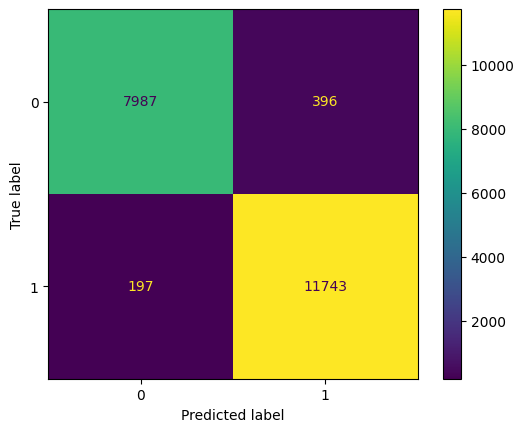

In [35]:
cm = confusion_matrix(y_test,y_pred_lr)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### **Accuracy of Logistic Regression Model : 0.97**


---
---


# **2. Support Vector Machine (SVM) Model**


### After exploring Logistic Regression, we'll now implement a Support Vector Machine (SVM) classifier. SVMs are particularly effective for text classification tasks due to their ability to handle high-dimensional data well.

## Optimizing SVM Performance

## _To address the computational intensity of SVM, especially with large datasets, we're using Intel's optimized scikit-learn extension_


In [37]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## We import and initialize our SVM classifier:


In [38]:
from sklearn.svm import SVC
svc = SVC()

### Then, we fit the model to our training data:


In [39]:
svc.fit(x_train_tfidf,y_train)

SVC()

## **Model Evaluation**

### After training, we use the model to make predictions on our test set:


In [40]:
y_pred_svc = svc.predict(x_test_tfidf)

In [41]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8383
           1       0.97      0.99      0.98     11940

    accuracy                           0.97     20323
   macro avg       0.98      0.97      0.97     20323
weighted avg       0.97      0.97      0.97     20323


In [42]:
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


## **Accuracy of SVC model : 0.97**


## **Confusion Matrix for SVC**


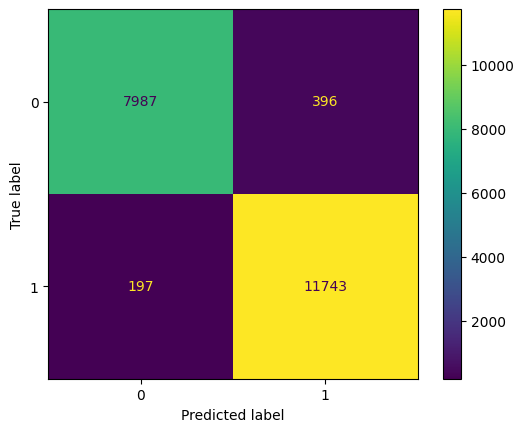

In [43]:
cm = confusion_matrix(y_test,y_pred_lr)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

---
---


# **3. XGBClassifier**


### **First, we need to import the necessary library for XGBClassifier**


In [44]:
from xgboost import XGBClassifier

### **Hyperparameter Tuning for XGBoost Classifier**


### **We initialize the XGBoost classifier.**


In [45]:
xgb_classifier = XGBClassifier()

### **We fit the model with the training data**


In [46]:
xgb_classifier.fit(x_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred_xgb = xgb_classifier.predict(x_test_tfidf)

In [48]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8383
           1       0.96      0.99      0.97     11940

    accuracy                           0.97     20323
   macro avg       0.97      0.97      0.97     20323
weighted avg       0.97      0.97      0.97     20323


In [49]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9700831570142203


### **Accuracy of XGBClassifier : 0.97**


---
---


# **4. Naive Nayes**


### **First, we need to import the necessary library for Naive Bayes**


In [50]:
from sklearn.naive_bayes import MultinomialNB

### **We initialize the Naive bayes clasifier.**


In [51]:
nb = MultinomialNB()

### **We fit the model with the training data**


In [52]:
nb.fit(x_train_tfidf,y_train)

MultinomialNB()

In [53]:
y_pred_nb = nb.predict(x_test_tfidf)

### **Classification report**


In [54]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      8383
           1       0.92      0.96      0.94     11940

    accuracy                           0.93     20323
   macro avg       0.93      0.92      0.92     20323
weighted avg       0.93      0.93      0.93     20323


In [55]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9273729272253112


### **Accuracy of Naive Bayes Classifier : 0.93**


## **Confusion Matrix For Naive Bayes**


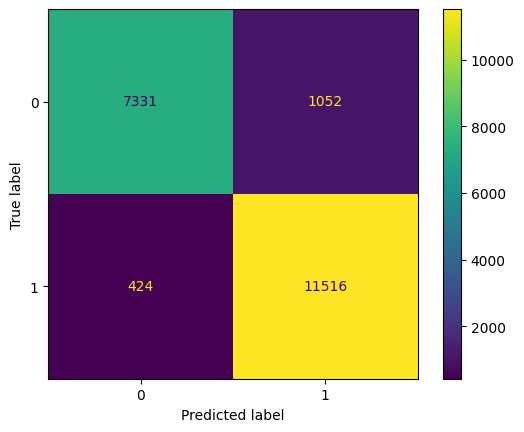

In [56]:
cm = confusion_matrix(y_test,y_pred_nb)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

---
---

---


## **<u>Conclusion</u>**

### **In this project, we developed a fake news detection system using multiple machine learning models. We utilized logistic regression, support vector classifier (SVC), XGBoost classifier, and Naive Bayes classifier. After extensive evaluation, the performance of each model was as follows:**


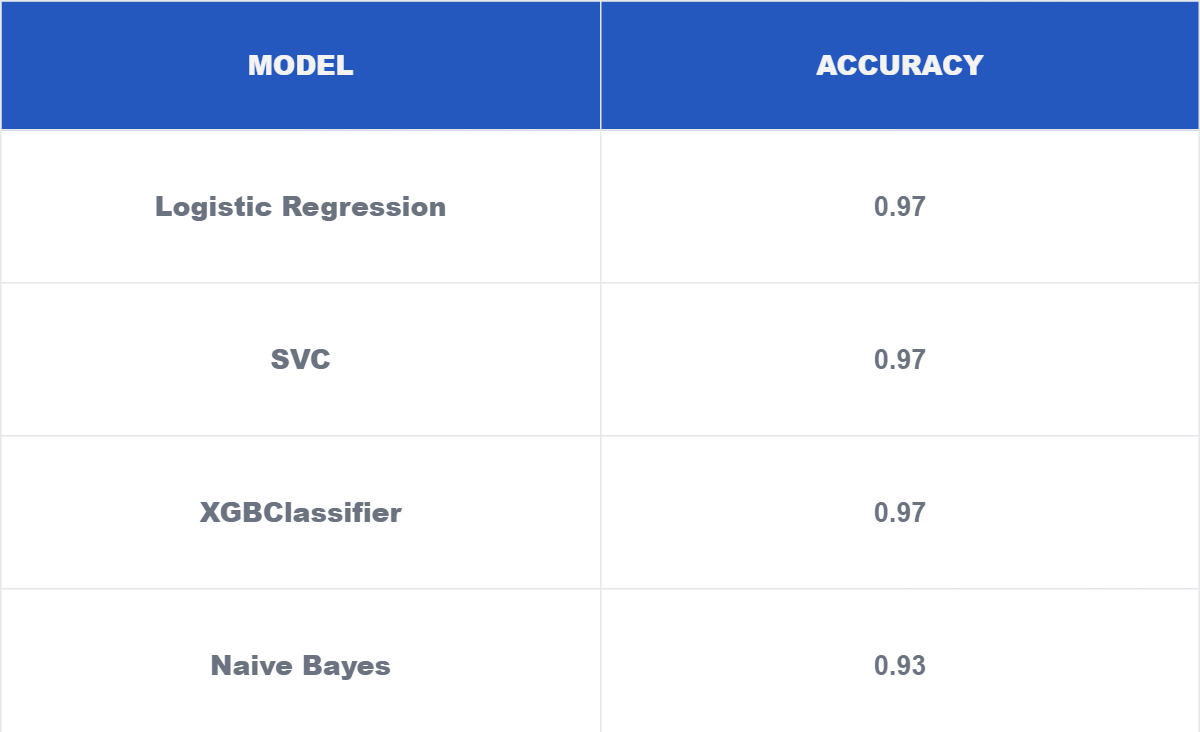


## **The logistic regression, SVC, and XGBoost classifier all achieved a high accuracy of 97%, indicating their effectiveness in detecting fake news. The Naive Bayes classifier, while slightly less accurate, still performed admirably with a 93% accuracy.**


#### **_Overall, the results demonstrate that machine learning models, particularly logistic regression, SVC, and XGBoost, are highly capable of distinguishing between real and fake news. This project showcases the potential of these models to aid in combating the spread of misinformation, providing a reliable tool for fake news detection._**
